In [1]:
import numpy
import pandas

from metrics import incom_not_weighted, income_by_filter
import matplotlib.pyplot as plt

from process import load_data
from transformator import Multiplier, transformators

df = load_data()
columns = ["P/E", "E/P", "P/B", "P/S", "P/CF", "L/A", "NetDebt / EBITDA", "EV / EBITDA", "ROA", "ROE", "ROS", "delta"]
M = Multiplier
delta = df['delta']

In [ ]:

def p_to_e_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 33:
        return 0
    l = (34 - x) * 3
    return (l/100.)**4*100

def e_to_p_atomic_transformator(x):
    if x < 0:
        return 0
    return x

def p_to_b_atomic_transformator(x):
    if x < 0:
        return 0
    l = (5-x) * 20
    l = max(l,0)
    return (l / 100.)**3*100

def p_to_s_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 5:
        return 0
    l = (5 - x) * 20
    return (l/100.)**3*100

def p_to_cf_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 30:
        return 0
    l = (30 - x) * 3.
    return (l/100)**1.5*100

def l_to_a_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 100:
        return 0
    l = (100 - x) * 1.
    return (l/100)**1*100

def net_debt_to_ebitda_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 5:
        return 0
    l = (5 - x) * 20.
    return (l/100)**3*100

def ev_to_ebitda_atomic_transformator(x):
    if x < 0:
        return 0
    if x > 33:
        return 0
    l = (34 - x) * 3
    return (l/100.)**4*100

def roa_atomic_transformator(x):
    return x

def roe_atomic_transformator(x):
    return x

def ros_atomis_transformator(x):
    return x

class Mult:
    p_to_e = "P/E"
    e_to_p = "E/P"
    


In [4]:
from scipy.stats import gmean

(gmean((delta / 100) + 1) -1 ) * 100

9.593654126261676

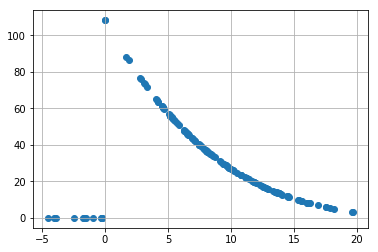

In [10]:
pe_original = df[M.p_to_e].tolist()
pe_original = [x for x in pe_original if x > -5 and x < 20]
def atomic_transformator(x):
    if x < 0:
        return 0
    if x > 33:
        return 0
    l = (34 - x) * 3
    return (l/100.)**4*100
pe_transformed = [atomic_transformator(x) for x in pe_original]
plt.scatter(pe_original, pe_transformed)
plt.grid()
plt.show()

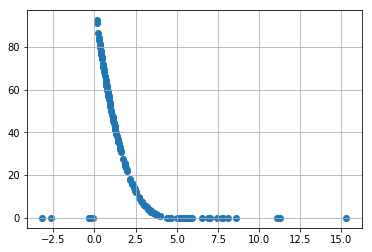

In [2]:
pe_original = df[M.p_to_b].tolist()
pe_original = [x for x in pe_original if x > -5 and x < 20]
atomic_transformator = transformators[M.p_to_b]
pe_transformed = [atomic_transformator(x) for x in pe_original]
plt.scatter(pe_original, pe_transformed)
plt.grid()
plt.show()

In [2]:
delta = df['delta']

In [3]:
c = columns[0]
c

'P/E'

In [4]:
def pe_filter_creator(pe):
    def actual_filter(x):
        if x < 0:
            return False
        return x < pe
    return actual_filter
    
pe_to_inc = []
for pe in range(20,0,-1):
    pe_to_inc.append((pe, income_by_filter(delta, df[c], pe_filter_creator(pe))))

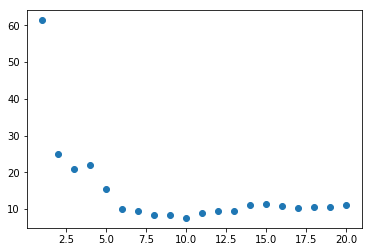

In [5]:
x, y = numpy.array(pe_to_inc).T
plt.scatter(x, y)
plt.show()

In [6]:
c = columns[1]
c

'E/P'

In [7]:
def ep_filter_creator(ep):
    def actual_filter(x):
        return x > ep
    return actual_filter
    
ep_to_inc = []
for ep in range(0,55,5):
    ep_to_inc.append((ep, income_by_filter(delta, df[c], ep_filter_creator(ep))))

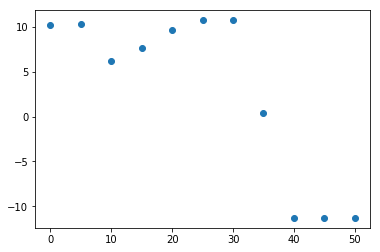

In [8]:
x, y = numpy.array(ep_to_inc).T
plt.scatter(x, y)
plt.show()

In [9]:
c = columns[2]
c

'P/B'

In [16]:
def pb_filter_creator(pb):
    def actual_filter(x):
        if x < 0:
            return False
        return x < pb
    return actual_filter
    
pb_to_inc = []
for pb in range(20,0,-1):
    pb_to_inc.append((pb, income_by_filter(delta, df[c], pe_filter_creator(pb))))

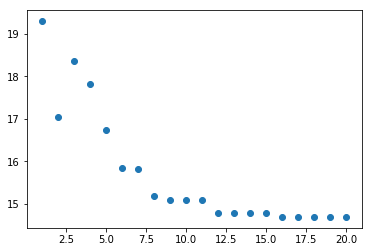

In [17]:
x, y = numpy.array(pb_to_inc).T
plt.scatter(x, y)
plt.show()